# One-hot Encoding
- 입력값으로 2차원 데이터가 필요하다
- 인코딩 결과가 밀집 행렬(Dense Matrix)이기 때문에 다시 희소 행렬(Parse Matrix)로 변환해야한다.

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

maker = ['Samsung', 'LG', 'Apple', 'SK']
maker = np.array(maker).reshape(-1, 1)
print(maker)

encoder = OneHotEncoder()  # onehotencoder클래스의 객체 생성
encoder.fit(maker)  # fit: 인코딩을 위해 필요한 데이터를 학습하는 과정
one_hot = encoder.transform(maker)  # transform: 데이터를 변환하는 과정

print('원-핫 인코딩 결과(밀집행렬)')
print(one_hot)
print()
print('원-핫 인코딩 결과(희소행렬)')
print(one_hot.toarray())

[['Samsung']
 ['LG']
 ['Apple']
 ['SK']]
원-핫 인코딩 결과(밀집행렬)
  (0, 3)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0

원-핫 인코딩 결과(희소행렬)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


## OneHotEncoder를 데이터 프레임에 적용

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame({'maker':['Samsung', 'LG', 'Apple', 'SK']})
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df['maker'].values.reshape(-1, 1)).toarray().astype(int)
print(encoded)

#df(np.sort(df['maker']))
df[['maker-apple', 'maker-LG', 'maker-SK','maker-Samsung']] = encoded
df

[[0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]]


,maker,maker-apple,maker-LG,maker-SK,maker-Samsung
0,Samsung,0,0,0,1
1,LG,0,1,0,0
2,Apple,1,0,0,0
3,SK,0,0,1,0


## pandas를 이용한 one-hot encoding

In [12]:
import pandas as pd

df = pd.DataFrame({'maker':['Samsung', 'LG', 'Apple', 'SK']})
pd.get_dummies(df, columns=['maker'])  # columns=: 인코딩이 필요한 컬럼 지정

,maker_Apple,maker_LG,maker_SK,maker_Samsung
0,False,False,False,True
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False


# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

language = ['Java', 'Python', 'C#', 'Pascal']
df = pd.DataFrame({'Language': language})
print('라벨 인코딩 전')
display(df)

encoded = LabelEncoder().fit_transform(language)
print(encoded)  # 알파벳 순서대로 일련번호 지정
df['language'] = encoded
print('라벨 인코딩 후')
df

라벨 인코딩 전


,Language
0,Java
1,Python
2,C#
3,Pascal


[1 3 0 2]
라벨 인코딩 후


,Language,language
0,Java,1
1,Python,3
2,C#,0
3,Pascal,2


## pandas의 label encoding

In [17]:
language = ['Java', 'Python', 'C#', 'Pascal']
df = pd.DataFrame({'language': language})

# key:데이터 값, value: 바뀌어야할 인덱스값
map_data = { v: i for i,v in enumerate(df['language'].sort_values())}  
df['language'] = df['language'].map(map_data)
df

,language
0,1
1,3
2,0
3,2


# 데이터 스케일링

## 표준화 (Standardization)

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
# .data: 독립변수, .feature_names: 독립변수 명들 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print('컬럼 평균')
print(iris_df.mean())

print('컬럼 분산')
print(iris_df.var())

컬럼 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
컬럼 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)  # 표준화를 하기 위한 학습
iris_scaled = scaler.transform(iris_df) # 표준화 적용
# transform-> 다차원배열, 데이터프레임 둘다 받을 수 있음, 반환은 다차원배열로
# iris_scaled = scaler.fit_transform(iris_df) # 전체 데이터에 대해 적용시(학습, 평가 데이터 분리안하고) fit, transform을 한번에 적용 가능

iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
display(iris_scaled_df.head())

print('표준화된 컬럼 평균')  # 0에 근사한 값
print(iris_scaled_df.mean())

print('표준화된 컬럼 표준편차')  # 1에 근사한 값
print(iris_scaled_df.std())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


표준화된 컬럼 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
표준화된 컬럼 표준편차
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## 정규화 (Normalization)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# minmaxscaler 객체 생성, 정규화 학습 및 적용
iris_scaled = MinMaxScaler().fit_transform(iris_df)  
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)

# 모든 데이터가 0~1사이로 바뀜
print('정규화된 컬럼 최소값')
print(iris_scaled_df.min())
print('정규화된 컬럼 최대값')
print(iris_scaled_df.max()) 

정규화된 컬럼 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
정규화된 컬럼 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# 불균형 데이터 처리

## imbalanced-learn 모듈 설치

In [7]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn==1.2.2 --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

## 불균형 데이터 생성

In [11]:
x, y = make_classification(n_samples=10000, n_features=5, weights=[0.99], flip_y=0, random_state=10) # n_features: 독립변수의 개수, weights: 종속변수의 비율, flip_y: y값이 임의로 변경되는 비율(default:0.01)
# 전체 레코드가 10000개, 컬럼이 5개, y는 0,1값(이진분류값)으로

print(x[:2,:])  # 값은 랜덤값, 종속변수 값은 이진분류값으로
print(x.shape, y.shape)
print(np.unique(y))
print(Counter(y))  # 0.01만큼 불순 데이터를 만들도록

[[ 0.38201186 -0.10502417 -1.65203303 -0.0260045   0.80085356]
 [ 0.03174755  0.65503326  0.94612307  0.32881832 -0.80422025]]
(10000, 5) (10000,)
[0 1]
Counter({0: 9900, 1: 100})


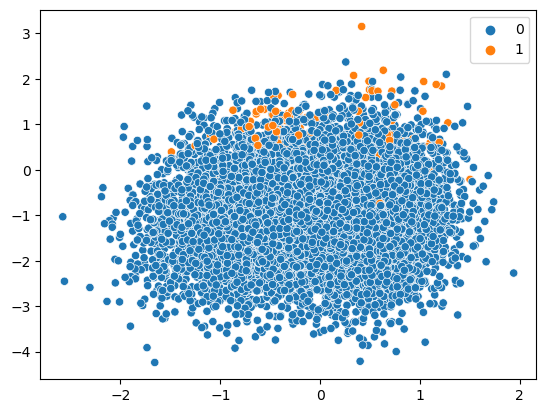

In [12]:
sns.scatterplot(x=x[:,3], y=x[:,4], hue=y)
plt.show()
# 0:1 , 99:1

## Under Sampling

### Random Under Sampling

In [14]:
# sampling_strategy = 'majority' : 다수 집단에서 언더 샘플링하여 소수 집단의 수와 동일하게 맞춘다
under_sample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = under_sample.fit_resample(x, y)
print(Counter(y_under))  # 1:1

Counter({0: 100, 1: 100})


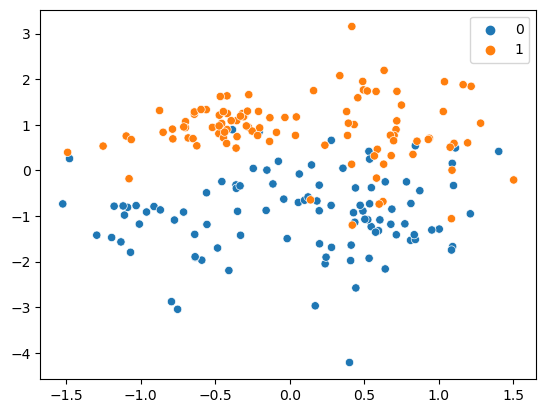

In [18]:
sns.scatterplot(x=x_under[:,3], y=x_under[:,4], hue=y_under)
plt.show()

In [20]:
# sampling_strategy의 값을 0~1 사이의 값으로 지정하면 비율 값 (소수집단 데이터 수/ 다수 집단 데이터 수)으로 다수 집단 데이터를 샘플링 한다
# 0.4 = 100 / 250
under_sample = RandomUnderSampler(sampling_strategy=0.4)
x_under, y_under = under_sample.fit_resample(x, y)
print(Counter(y_under)) # 6:4

Counter({0: 250, 1: 100})


## Tomek Link
- sampling strategy
  - 'majority': 다수집단 데이터만 샘플링
  - 'not minority': 소수 집단을 제외한 나머지 범주 데이터를 리샘플링
  - 'not majority': 다수 집단을 제외한 나머지 범주 데이터를 리샘플링
  - 'all': 모든 범주 데이터를 리샘플링
  - 'auto': 'not minority'와 동일

In [21]:
from imblearn.under_sampling import TomekLinks

tomek_link = TomekLinks(sampling_strategy='auto')
x_under, y_under = tomek_link.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 9854, 1: 100})


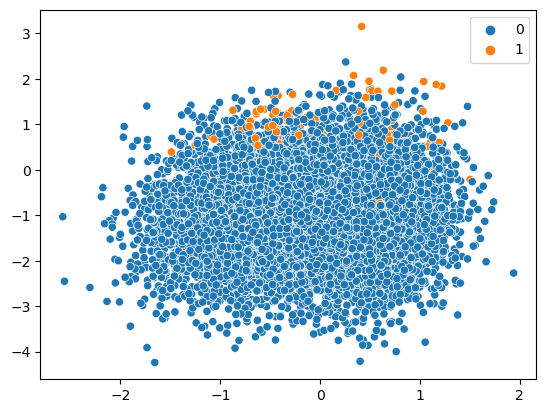

In [22]:
sns.scatterplot(x=x_under[:,3], y=x_under[:,4], hue=y_under)
plt.show()

## Over Sampling

### Random Over Sampling

In [23]:
over_sample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = over_sample.fit_resample(x, y) # 원본데이터를 오버샘플링한 값을 할당
print(Counter(y_over))   # 1: 100개 -> 9900개

Counter({0: 9900, 1: 9900})


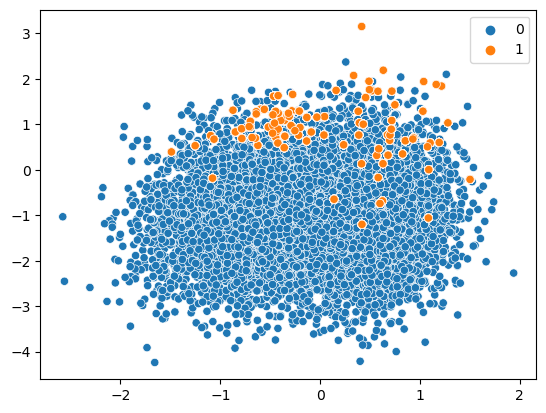

In [24]:
# 동일 데이터에 대해 반복적으로 복제해서 만들었기 때문에 산점도가 원본데이터와 같아 보임
sns.scatterplot(x=x_over[:,3], y=x_over[:,4], hue=y_over)
plt.show()

### SMOTE

In [26]:
smote_sample = SMOTE(sampling_strategy=0.4)
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm)) # 비율에 맞춰 소수 데이터 생성

Counter({0: 9900, 1: 3960})


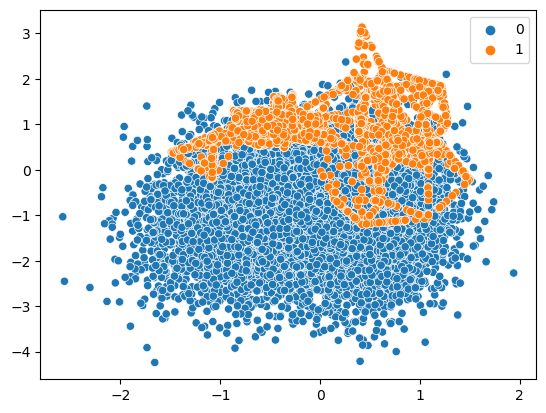

In [27]:
sns.scatterplot(x=x_sm[:,3], y=x_sm[:,4], hue=y_sm)
plt.show()

## Cost Sensitive Learning
- 라벨 가중치 옵션 사용

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score  # 계층화된 교차검증(K-fold), 분류모형에 대한 교차검증 시에 활용 / 교차검증마다 모델의 평가점수를 받아오기위한 함수
from sklearn.ensemble import RandomForestClassifier  # 분류모형에 사용되는 의사모형나무

def evaluate_model(x, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)  # 데이터를 5개로 나눠서 교차검증, 한번 교차검증할 때마다 3번씩 반복
    scores = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1)  # scoring : 어떤 평가지표를 쓸건지(precision: 정밀도), cv: 교차검증 객체
    # n_jobs: cpu 연산 코어의 개수 의미, -1; 가능한 모든 코어를 사용해라
    return scores

model = RandomForestClassifier(n_estimators=100)  # 모델에 의사결정나무를 몇 개 만들건지
scores = evaluate_model(x, y, model)  # 5번의 교차검증한 것을 리스트로 넘겨줌
print(f'Mean Precision No Weight: {np.mean(scores):.3f}')   # 5번 교차검증한 것의 평균값

weights = {0:1.0, 1:10}  # label에 대해 가중치를 부여해서 학습
model = RandomForestClassifier(n_estimators=100, class_weight=weights)#'balanced')  
# class_weight: 종속변수 label별 가중치 부여
# 'balanced': 각 클래스에 대해 [전체 샘플수 / (클래스 수 * 클래스 별 빈도)]로 계산된 가중치 부여
scores = evaluate_model(x, y, model)  
print(f'Mean Precision Weight: {np.mean(scores):.3f}') 

Mean Precision No Weight: 0.354
Mean Precision Weight: 0.317


# 다중공선성 및 변수 선택

- statsmodels: 파이썬에서 통계 모델링을 위한 기능을 제공하는 라이브러리이다.
- longley dts는 공선성이 매우 높은 것으로 알려진 미국 거시경제 지표가 포함되어 있다.

In [1]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- load_pandas()dml Dataset 객체 속성
  - data: DataFrame 객체로 전체 데이터 반환
  - endog: Series 객체로 종속변수 값 반환
  - exog: DataFrame 객체로 독립변수 값 반환

- 변수 설명
  - 독립변수
    - GNPDEFL: GNP 디플레이터
    - GNP: GNP
    - UNEMP: 실업자 수
    - ARMED: 무장 세력 규모
    - POP: 인구
    - YEAR: 년도
  - 종속변수 - TOTEMP: 총 고용

In [4]:
data = load_pandas()
df = data.data
print(df.shape)
display(df.head())

(16, 7)


,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [6]:
# 독립변수와 종속변수 분리
data_x = data.exog  # 독립변수 값 가져오기 (DataFrame)
data_y = data.endog # 종속변수 값 가져오기 (Series)

## 독립변수 간 상관관계 확인
- 회귀분석에서 독립변수 들 사이에 선형관계가 존재하면 회귀계수의 정확한 추정이 어렵다.

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

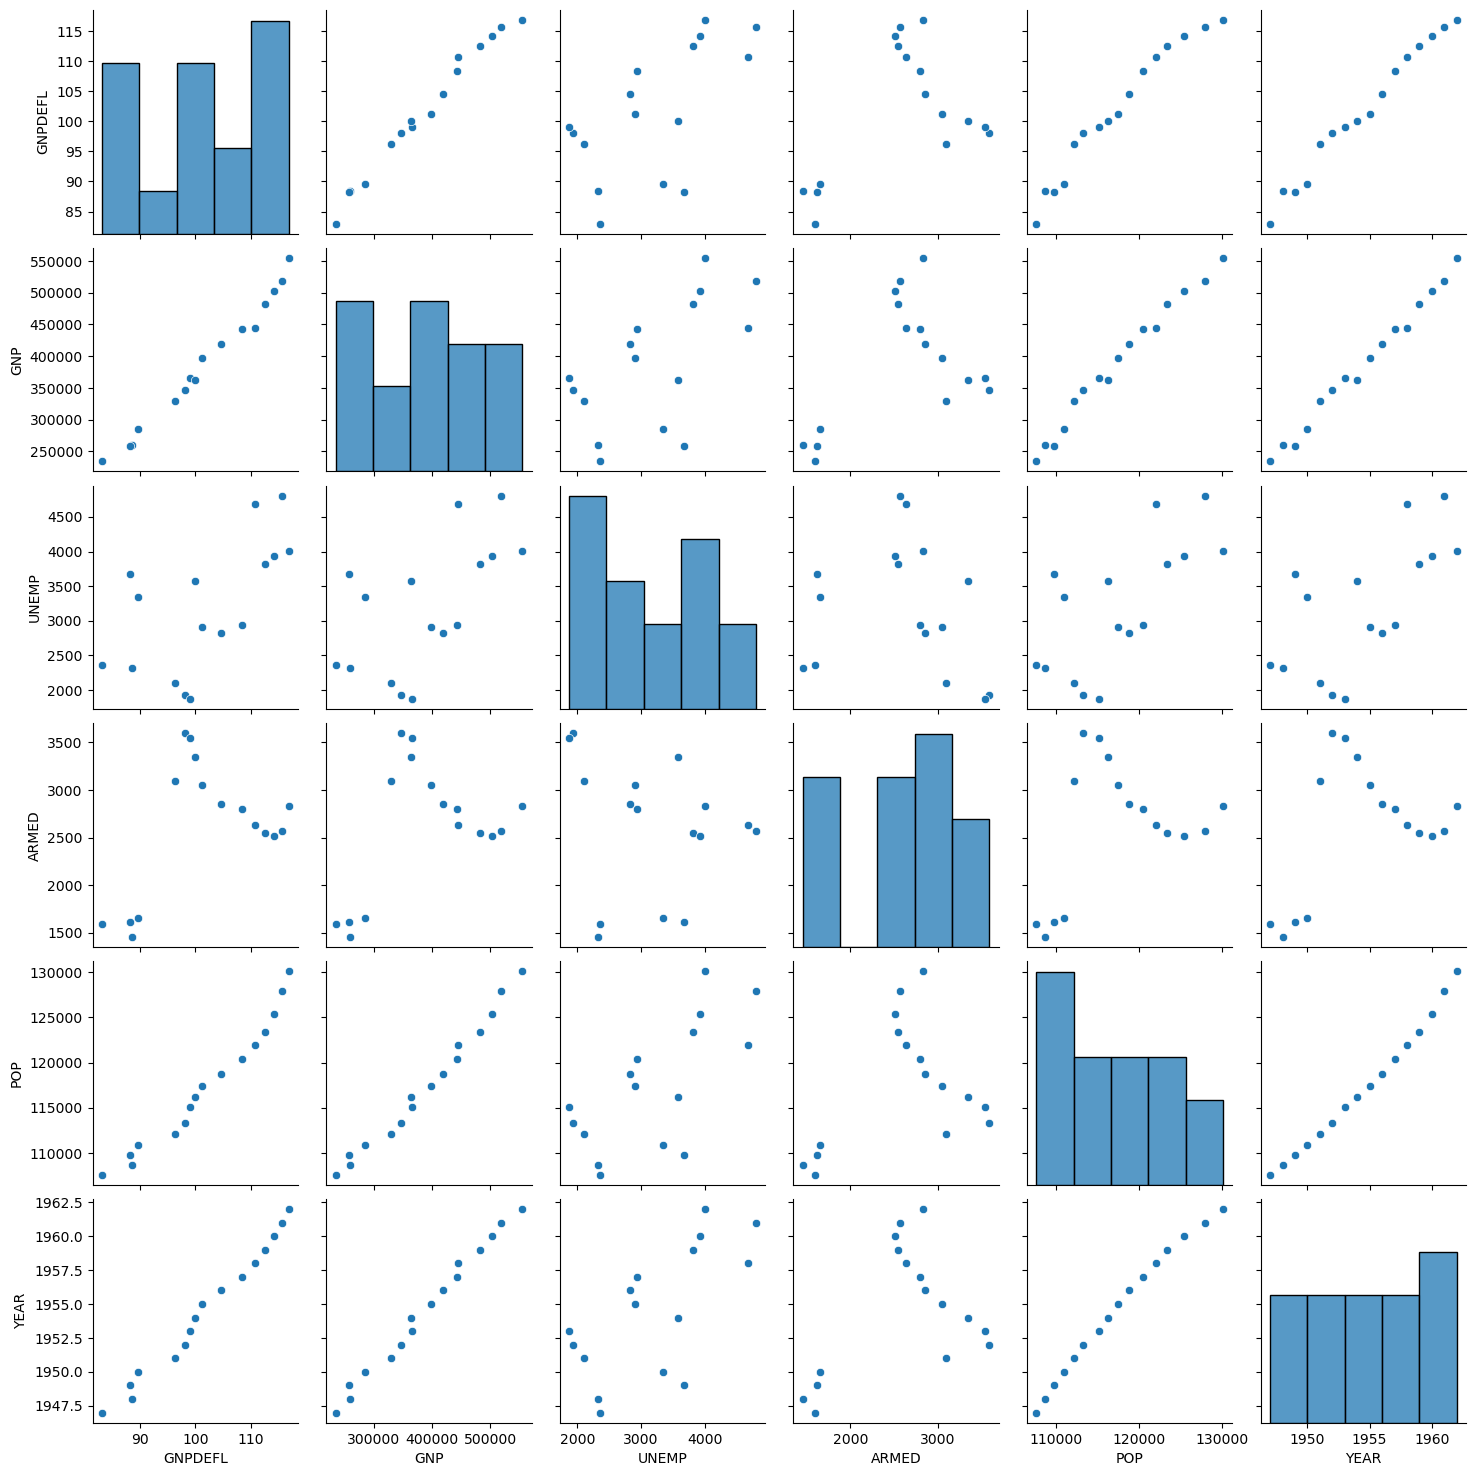

In [8]:
# 독립변수간 상관관계 시각화
sns.pairplot(data_x)
plt.show()

In [9]:
# 독립변수 간 상관관계 값
data_x.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


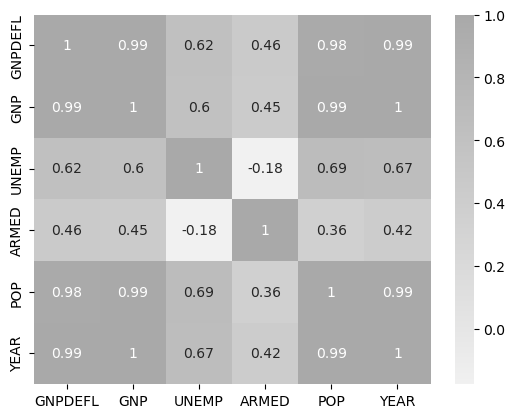

In [10]:
# 상관관계 수치 시각화, 상관관계가 높을 수록 진한 색
cmap = sns.light_palette('darkgrey', as_cmap=True)
sns.heatmap(data_x.corr(), annot=True, cmap=cmap)
plt.show()

## VIF 값 확인
- 의존적인 독립변수를 선택하는 방법으로 VIF(Variance Inflation Factor)를 사용할 수 있다.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor(data_x.values, i) for i in range(data_x.shape[1])]   # 각 컬럼(독립변수)를 각각 순회하면서 VIF 확인
vif['Features'] = data_x.columns  # 각 컬럼(독립변수)
vif

,VIF,Features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor(data_x.values, i) for i in range(data_x.shape[1])] 
vif['Features'] = data_x.columns 
vif

,VIF,Features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


## 독립변수 스케일링 후 VIF 값 확인

In [17]:
from sklearn.preprocessing import StandardScaler

data_x_scaled = StandardScaler().fit_transform(data_x) # 데이터 표준화

vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor(data_x_scaled, i) for i in range(data_x.shape[1])]
vif['Features'] = data_x.columns
vif

,VIF,Features
0,135.532438,GNPDEFL
1,1788.513483,GNP
2,33.618891,UNEMP
3,3.588930,ARMED
4,399.151022,POP
5,758.980597,YEAR


# 선형회귀분석

## 다중공선성 제거 전 모델 학습

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data_x_scaled, data_y, test_size=0.4, random_state=10)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
print(f'결정계수: {model.score(x_test, y_test):.3f}')

결정계수: 0.928


## 다중공선성 제거 후 모델 학습

In [22]:
data_x_new = data_x[['GNPDEFL', 'UNEMP', 'ARMED']]
data_x_new.head()

,GNPDEFL,UNEMP,ARMED
0,83.0,2356.0,1590.0
1,88.5,2325.0,1456.0
2,88.2,3682.0,1616.0
3,89.5,3351.0,1650.0
4,96.2,2099.0,3099.0


In [23]:
# 표준화
data_x_new_scaled = StandardScaler().fit_transform(data_x_new) 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data_x_new_scaled, data_y, test_size=0.4, random_state=10)

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)
print(f'결정계수: {model.score(x_test, y_test):.3f}')
# 변수를 선택한다고 해서 항상 결정계수가 높아지는 것은 아님, 원데이터 손실로 낮아질 수도 있음

결정계수: 0.954
